In [2]:
import mnist
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict

In [3]:
X_train = mnist.train_images()
y_train = mnist.train_labels()

X_test = mnist.test_images()
y_test = mnist.test_labels()

print("X_train size: {}".format(X_train.shape))
print("X_test size: {}".format(X_test.shape))

print("y_train size: {}".format(y_train.shape))
print("y_test size: {}".format(y_test.shape))

y_train = y_train.reshape((y_train.shape[0],1))
y_test  = y_test.reshape((y_test.shape[0],1))

print("y_train size: {}".format(y_train.shape))
print("y_test size: {}".format(y_test.shape))


skfolds = StratifiedKFold(n_splits=3, random_state=42)
print(skfolds)


X_train size: (60000, 28, 28)
X_test size: (10000, 28, 28)
y_train size: (60000,)
y_test size: (10000,)
y_train size: (60000, 1)
y_test size: (10000, 1)
StratifiedKFold(n_splits=3, random_state=42, shuffle=False)


Current label: [8]


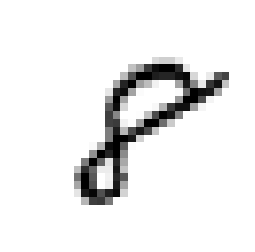

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

guess = 59999

some_digit = X_train[guess]
some_digit_image = some_digit.reshape(28,28)
print('Current label: {}'.format(y_train[guess]))


plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [13]:
shuffle_index = np.random.permutation(60000)
X_train_shuffled, y_train_shuffled = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train_shuffled == 5)
y_test_5 = (y_test == 5)

sample_size = 60000

X_train_mini, y_train_mini = X_train_shuffled[0:sample_size,:,:], y_train_5[0:sample_size]

X_train_mini = X_train_mini.reshape(sample_size, 28 * 28)

print(X_train_mini.shape)
print(y_train_mini.shape)

(60000, 784)
(60000, 1)


In [8]:
sgd_clf = SGDClassifier(random_state = 42)


sgd_clf.fit(X_train_mini, y_train_mini)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
guess_again = 7500



total_sample_size = y_test.shape[0]
predict_Vec = np.zeros((total_sample_size,1))
for _ in range(total_sample_size):
    predict_Vec[_] = sgd_clf.predict(X_test[_].reshape(1,784)) == y_test[_]

sum(predict_Vec)
    
#print(np.where(predictVec == 0)[0])

y_test_pred = cross_val_predict(sgd_clf, X_test.reshape((10000,784)), y_test, cv = 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset,

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

confusion_matrix(y_test_5, y_test_pred)

#precision_score(y_test, y_test_pred)

array([[ 996, 1186,  973,  838, 1004,  227,  961,  914,  907, 1102],
       [  15,    8,    8,   24,   38,  675,   15,    9,   74,   26],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)